In [6]:
import numpy as np 
import pandas as pd 

# импортируем необходимые пакеты
import pandas as pd                 # для работы с табличными данными
import matplotlib.pyplot as plt     # для визуализации
import seaborn as sns               # для визуализации


import nltk   # библиотека для обработки естественного языка
from nltk.corpus import stopwords, wordnet
# stopwords - список стоп-слов (часто встречающиеся слова, которые обычно удаляются: "the", "a", "is", "in")
# wordnet - лексическая база данных английского языка для синонимов и семантических отношени
from nltk.tokenize import word_tokenize
# Функция для разделения текста на отдельные слова (токены)

from nltk.stem import WordNetLemmatizer
# Лемматизатор для приведения слов к их базовой форме (лемме):


import string
import re                           # библиотека обработки регулярных выражений

from sklearn.model_selection import train_test_split         # инструмент сплитования набора данных
from sklearn.feature_extraction.text import TfidfVectorizer  # векторизация текста

from sklearn.linear_model import LogisticRegression          # алгоритм логистической регрессии
from sklearn.metrics import classification_report, ConfusionMatrixDisplay # набор метрик для задач классификации

from catboost import Pool, CatBoostClassifier               # библиотека градиентного спуска

import warnings
warnings.filterwarnings('ignore') # Игнорирование всех предупреждений

In [ ]:
# import nltk
# nltk.download('popular')  # скачивает все популярные пакеты

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |   

True

In [ ]:
# загружаем тренировочный набор данных
train_data = pd.read_csv(r'D:/Git/recurrent_networks/train.csv')
train_data.head()

,name,genre,text
0,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [ ]:
# загружаем тестовый набор данных
test_data = pd.read_csv(r'D:/Git/recurrent_networks/test.csv')
test_data.head()

,name,text
0,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,Er nu zhai (1955),Before he was known internationally as a mart...


In [12]:
#Все ли фильмы содержат категорию-жанр и текстовое описание или имеются пропуски.
print("Пропуски в train_data:")
print(train_data.isnull().sum())

print("\nПропуски в test_data:")
print(test_data.isnull().sum())

Пропуски в train_data:
name     0
genre    0
text     0
dtype: int64

Пропуски в test_data:
name    0
text    0
dtype: int64


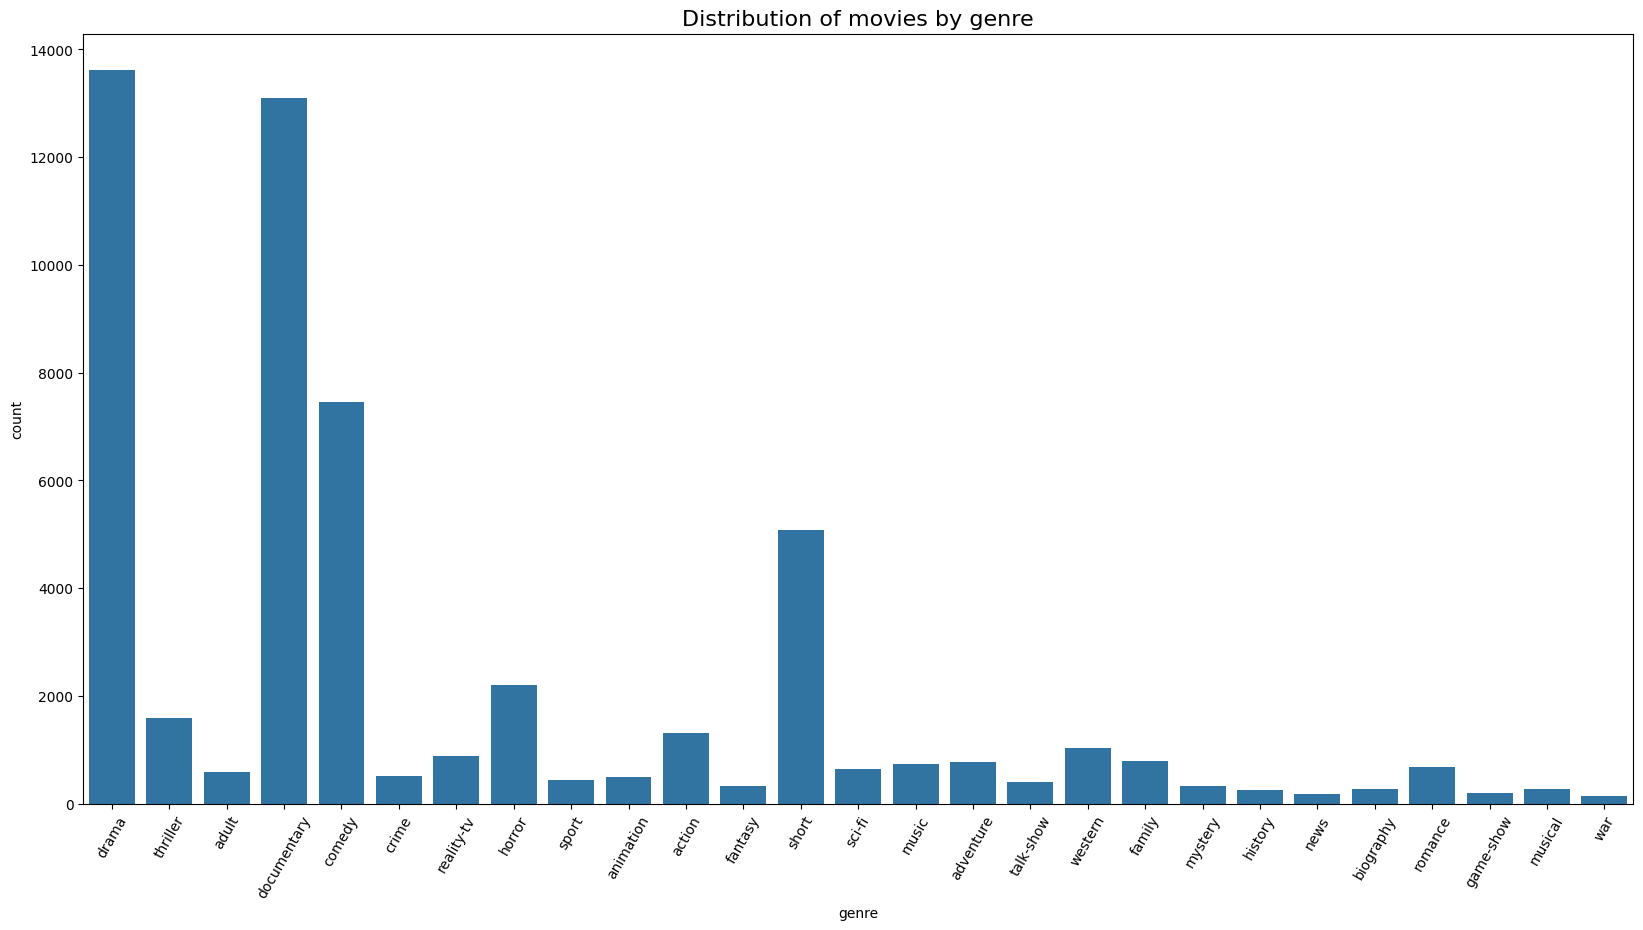

In [14]:
plt.figure(figsize=(20,10))
sns.countplot(train_data, x='genre')   # график для подсчета категориальных признаков
plt.xticks(rotation=60)
plt.title('Distribution of movies by genre', fontsize=16);